In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
x,y = make_blobs(n_samples=1000,centers=3, n_features=2)

In [4]:
x

array([[-1.25592751, -6.28477331],
       [-6.23178667,  0.73990248],
       [-6.49525461,  1.45215517],
       ...,
       [-1.29570223, -5.20445909],
       [-5.74647519,  1.44346659],
       [-0.85558683, -3.93694232]])

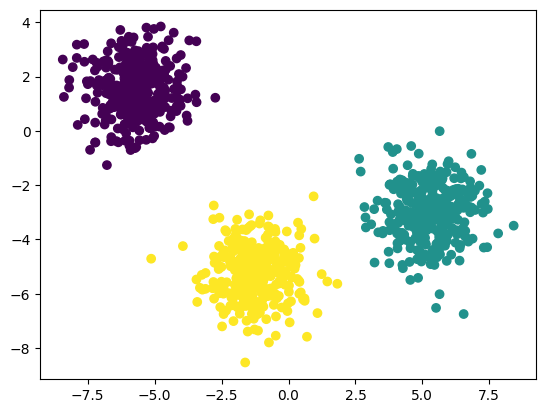

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.33,random_state=42)

In [10]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow Method - to select the K values
wcss = []
for k in range (1,11):
  k_means = KMeans(n_clusters=k,init="k-means++")
  k_means.fit(x_train_scaled)
  wcss.append(k_means.inertia_)

In [15]:
wcss

[659.9999999999999,
 201.71401350111367,
 50.25083514881776,
 42.085740984166726,
 35.441359937213214,
 31.232434612227706,
 30.93008788378074,
 22.673071486451757,
 20.66523534326038,
 19.774544118906363]

<function matplotlib.pyplot.show(close=None, block=None)>

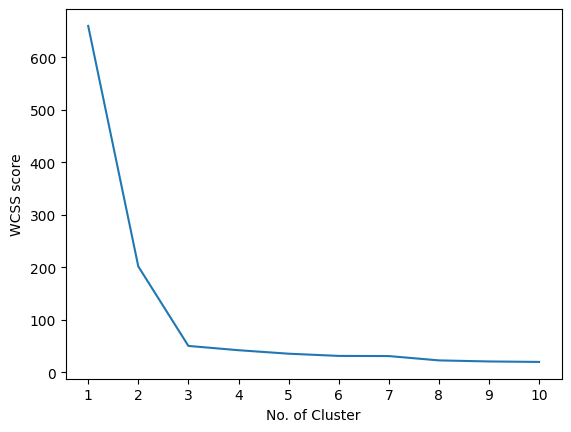

In [18]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of Cluster")
plt.ylabel("WCSS score")
plt.show


In [19]:
k_means = KMeans(n_clusters=3,init="k-means++")

In [23]:
k_means.fit_predict(x_train_scaled)

array([0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2,
       0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0,
       0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2,

In [24]:
y_pred = k_means.predict(x_test_scaled)

In [25]:
y_pred

array([2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0,
       2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2,
       0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 0,
       0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2,
       2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,

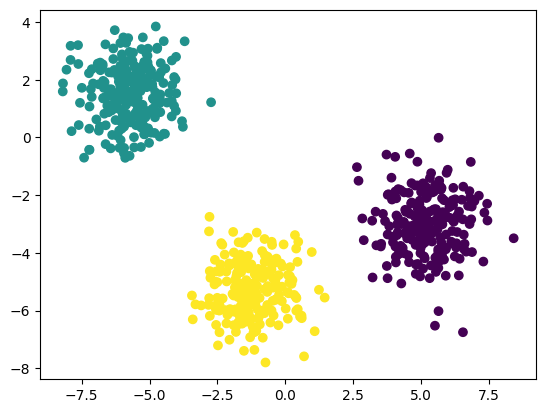

In [28]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [ ]:
# Validating the k value
## kneelocator
# Silhoutte Scoring

In [29]:
!pip install kneed

In [31]:
from kneed import KneeLocator

In [33]:
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [34]:
kl.elbow

np.int64(3)

In [35]:
from sklearn.metrics import silhouette_score

In [38]:
Sil_score = []
for k in range (2,11):
  k_means = KMeans(n_clusters=k,init="k-means++")
  k_means.fit(x_train_scaled)
  score =silhouette_score(x_train_scaled,k_means.labels_)
  Sil_score.append(score)

In [39]:
Sil_score

[np.float64(0.6604950168910975),
 np.float64(0.7381988964419364),
 np.float64(0.6231761852915833),
 np.float64(0.5348761766698815),
 np.float64(0.510323791651707),
 np.float64(0.3595384485234136),
 np.float64(0.3463769333664696),
 np.float64(0.34371511689814094),
 np.float64(0.3236025931114518)]

<function matplotlib.pyplot.show(close=None, block=None)>

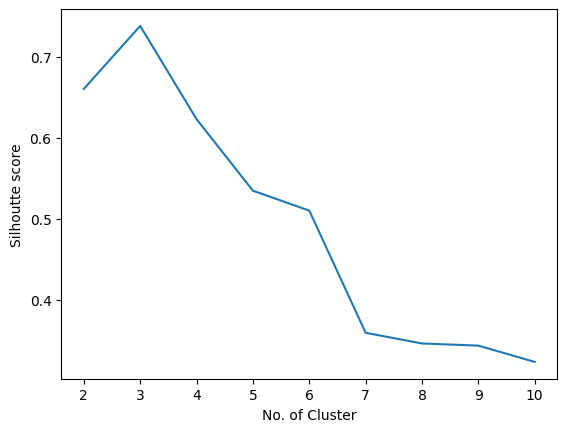

In [42]:
plt.plot(range(2,11),Sil_score)
plt.xticks(range(2,11))
plt.xlabel("No. of Cluster")
plt.ylabel("Silhoutte score")
plt.show
